In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as mdates
import re
import os
import datetime
import warnings


In [10]:
base_dir ='data\AirQuality\AirQo'
average_pm25_concentrations_foreach_hour_for_different_locations = pd.read_csv(os.path.join(base_dir,'average_pm25_concentration_for_each_hour_of_day_for_different_locations_a.csv'))
#average_pm25_concentrations_foreach_hour_for_different_locations = pd.read_csv(os.path.join(base_dir,'average_pm25_concentration_for_each_hour_of_day_for_different_locations_report_wb.csv'))
#average_pm25_concentrations_foreach_hour_for_different_locations = pd.read_csv(os.path.join(base_dir,'average_pm25_concentration_for_each_hour_of_day_for_different_locations.csv'))
average_pm25_concentrations_foreach_hour_for_different_locations.head()

,Hour,PM2.5(Ug/m3)_Makerere,PM2.5(Ug/m3)_Bugolobi,PM2.5(Ug/m3)_Mulago,PM2.5(Ug/m3)_Makindye,PM2.5(Ug/m3)_Bukoto
0,0:00:00,11.92,23.40,32.53,22.76,39.18
1,1:00:00,11.66,21.73,29.90,22.14,32.78
2,2:00:00,12.43,21.12,24.95,21.00,30.04
3,3:00:00,10.61,21.59,21.78,19.19,27.20
4,4:00:00,10.82,21.13,19.59,18.15,26.81


In [11]:
average_pm25_concentrations_foreach_hour_for_different_locations['Hour']= pd.to_timedelta(average_pm25_concentrations_foreach_hour_for_different_locations['Hour'],unit='h')
average_pm25_concentrations_foreach_hour_of_day= average_pm25_concentrations_foreach_hour_for_different_locations.set_index('Hour')

In [12]:
current_date = datetime.datetime.now()
average_pm25_concentrations_foreach_hour_of_day['Date'] = pd.to_datetime(current_date.strftime('%Y-%m-%d')) 
average_pm25_concentrations_foreach_hour_of_day['Time(hrs)']= average_pm25_concentrations_foreach_hour_of_day.index
average_pm25_concentrations_foreach_hour_of_day['Time(hrs)']
average_pm25_concentrations_foreach_hour_of_day[['Date','Time(hrs)']].dtypes
average_pm25_concentrations_foreach_hour_of_day['TimeStamp']  = average_pm25_concentrations_foreach_hour_of_day['Date']+ average_pm25_concentrations_foreach_hour_of_day['Time(hrs)']
average_pm25_concentrations_foreach_hour_of_day.head()

,PM2.5(Ug/m3)_Makerere,PM2.5(Ug/m3)_Bugolobi,PM2.5(Ug/m3)_Mulago,PM2.5(Ug/m3)_Makindye,PM2.5(Ug/m3)_Bukoto,Date,Time(hrs),TimeStamp
Hour,,,,,,,,
00:00:00,11.92,23.40,32.53,22.76,39.18,2019-06-24,00:00:00,2019-06-24 00:00:00
01:00:00,11.66,21.73,29.90,22.14,32.78,2019-06-24,01:00:00,2019-06-24 01:00:00
02:00:00,12.43,21.12,24.95,21.00,30.04,2019-06-24,02:00:00,2019-06-24 02:00:00
03:00:00,10.61,21.59,21.78,19.19,27.20,2019-06-24,03:00:00,2019-06-24 03:00:00
04:00:00,10.82,21.13,19.59,18.15,26.81,2019-06-24,04:00:00,2019-06-24 04:00:00


In [13]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

In [14]:
#show_dataframe_info(average_pm25_concentrations_foreach_hour)

In [15]:
average_pm25_concentrations_foreach_hour_for_different_locations.head()

,Hour,PM2.5(Ug/m3)_Makerere,PM2.5(Ug/m3)_Bugolobi,PM2.5(Ug/m3)_Mulago,PM2.5(Ug/m3)_Makindye,PM2.5(Ug/m3)_Bukoto
0,00:00:00,11.92,23.40,32.53,22.76,39.18
1,01:00:00,11.66,21.73,29.90,22.14,32.78
2,02:00:00,12.43,21.12,24.95,21.00,30.04
3,03:00:00,10.61,21.59,21.78,19.19,27.20
4,04:00:00,10.82,21.13,19.59,18.15,26.81


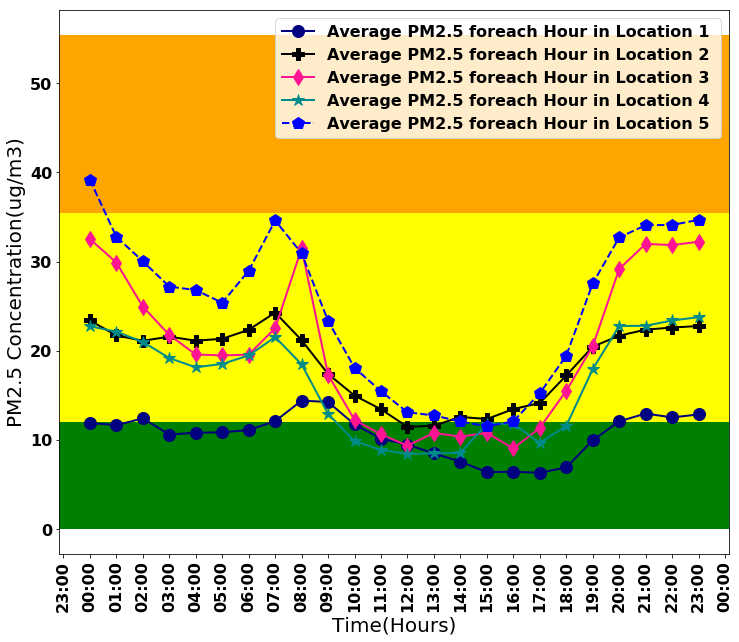

In [16]:
    #y_axis_values = average_pm25_concentration_for_each_hour_of_day['PM2.5(Ug/m3)'].values
    #x_axis_values = average_pm25_concentration_for_each_hour_of_day['TimeStamp'].values
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    x_axis_label = 'Time(Hours)'
    y_axis_label =  'PM2.5 Concentration(ug/m3)'
    chart_title  =  'Average PM2.5 foreach Hour for the different locations'
    file_path    =   os.path.join(base_dir , 'average_pm25_foreach_hour_for_selected_locations_a_b.png')
    
    fig = plt.figure(figsize=(12,10))
    plt.rcParams.update({'font.size':16, 'font.weight':'bold'})
    ax = fig.add_subplot(111)
    plt.plot(average_pm25_concentrations_foreach_hour_of_day['TimeStamp'].values, 
             average_pm25_concentrations_foreach_hour_of_day['PM2.5(Ug/m3)_Makerere'].values, #Makerere
             color='navy', marker='o', linestyle='solid',  label='Average PM2.5 foreach Hour in Location 1', linewidth=2.0,markersize=12)
    
    plt.plot(average_pm25_concentrations_foreach_hour_of_day['TimeStamp'].values, 
             average_pm25_concentrations_foreach_hour_of_day['PM2.5(Ug/m3)_Bugolobi'].values, #Bugolobi
             color='black', marker='P', linestyle='solid',  label='Average PM2.5 foreach Hour in Location 2 ', linewidth=2.0,markersize=12)
    
    plt.plot(average_pm25_concentrations_foreach_hour_of_day['TimeStamp'].values, 
             average_pm25_concentrations_foreach_hour_of_day['PM2.5(Ug/m3)_Mulago'].values, #Mulago
             color='deeppink', marker='d', linestyle='solid',  label='Average PM2.5 foreach Hour in Location 3 ', linewidth=2.0,markersize=12)
    
    plt.plot(average_pm25_concentrations_foreach_hour_of_day['TimeStamp'].values, 
             average_pm25_concentrations_foreach_hour_of_day['PM2.5(Ug/m3)_Makindye'].values,  #Makindye
             color='darkcyan', marker='*', linestyle='solid',  label='Average PM2.5 foreach Hour in Location 4',linewidth=2.0, markersize=12)
    
    plt.plot(average_pm25_concentrations_foreach_hour_of_day['TimeStamp'].values, 
             average_pm25_concentrations_foreach_hour_of_day['PM2.5(Ug/m3)_Bukoto'].values, #Bukoto 
             color='blue', marker='p', linestyle='dashed',  label='Average PM2.5 foreach Hour in Location 5',linewidth=2.0, markersize=12)
    
    #plt.title(chart_title, fontsize=20)
    plt.ylabel(y_axis_label, fontsize=20)
    plt.xlabel(x_axis_label,fontsize=20)
    
    hours = mdates.HourLocator(interval = 1)
    hour_format = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hour_format)
    #ax.set_xticklabels(rotation='vertical', fontsize=14)
    plt.xticks(rotation=90)
    ##coloring
    ax.axhspan(0, 12, facecolor='green')
    ax.axhspan(12, 35.4, facecolor='yellow')
    ax.axhspan(35.4, 55.4, facecolor='orange')
    #ax.axhspan(55.4, 150.4, facecolor='red')
    #ax.axhspan(150.4, 250.4, facecolor='purple')
    #ax.axhspan(250.4, 350.4, facecolor='maroon')
    plt.legend()
    plt.show()
    fig.savefig(file_path)